<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Pytorch_Intro_for_Experts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [ ]:
train_dataset = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor(), 
    #target_transform = Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value = 1))
)

In [ ]:
test_dataset = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor(),
  #  target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y), value =1))
)

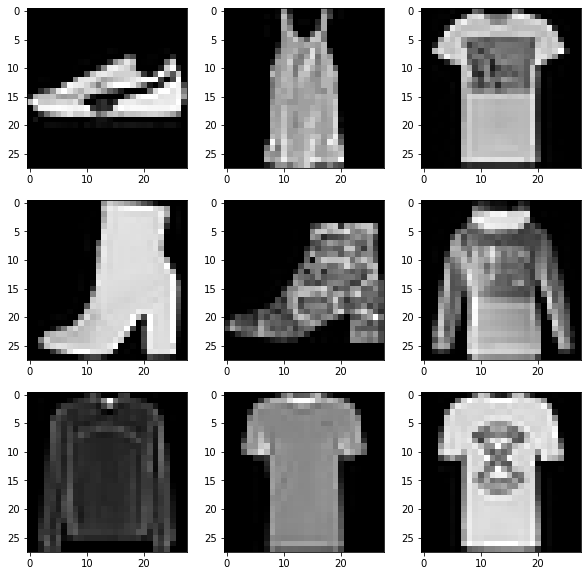

In [ ]:
#Visualize the data before building the computational graph 
figure = plt.figure(figsize =(10,10))
rows,cols = 3,3
for i  in range(1,rows * cols + 1):
  simple_idx = torch.randint(len(train_dataset),size =(1,)).item()
  images,labels = train_dataset[simple_idx]
  figure.add_subplot(rows,cols,i)
  plt.imshow(images.squeeze(),cmap="gray")

In [ ]:
#Build the computational graph 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers__relu__stack = nn.Sequential(
        nn.Linear(28 * 28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10) 
    )

  def forward(self,x):
    x = self.flatten(x)
    logits =  self.layers__relu__stack(x)
    return logits

In [ ]:
#Create an instance of our model and pass it to the computational graph 
model = NeuralNetwork().to(device)

In [ ]:
#Define the hyper parameters of our model
loss_fn = nn.CrossEntropyLoss()
batch_size = 64
epochs = 10 
learning_rate = 1e-3 #Equivalent to 1 * 10 - 3
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [13]:
#Define the training loop
def train_loop(dataloader,models,loss_fn,optimizer):
  size = len(dataloader.dataset)

  for batch,(X,y) in enumerate(dataloader):
    #Predictions 
    pred  = model(X)
    loss = loss_fn(pred,y)
    #Backprop 
    optimizer.zero_grad()#Reset the model's parameters 
    loss.backward() #Calculate the gradient of the loss
    #Update the weights based on the gradient of the loss
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(),batch * len(dataloader)
      print(f"loss:{loss:>7f} [{current:>5d}/{size:>5d}]")


#Define the training loop 
def test_loop(dataloader,model, loss_fn):
  size = len(dataloader.dataset)
  num_batch = len(dataloader)
  test_loss,correct = 0,0

  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred,y).item()      
      correct += (pred.argmax(1) == y).type(torch.float32).sum().item()
  
  test_loss /= num_batch 
  correct /= size

  print(f"Test Error: \n Accuracy:{(100 * correct):>0.1f}%, Avg loss {test_loss:>8f}\n")

In [12]:
train_loader = DataLoader(train_dataset,batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size = batch_size)
for t in range(epochs):
  print(f"Epoch {t + 1} ------------------>")
  train_loop(train_loader, model, loss_fn,optimizer)
  test_loop(test_loader,model, loss_fn)
  print("Done")

Epoch 1 ------------------>


NameError: ignored

In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [28]:
train_dataset = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor(),
    )
    #target_transform = Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value = 1)))

In [29]:
test_dataset = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor(),
    #target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value = 1))  
)

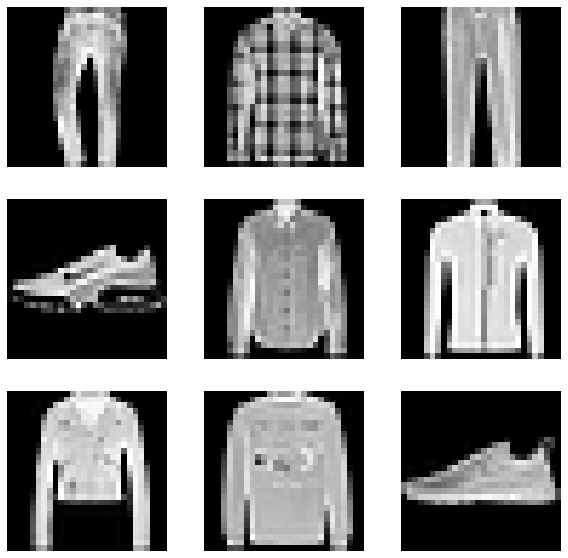

In [30]:
#Visualize the data before building the network
figure = plt.figure(figsize=(10,10))
cols,rows = 3,3
for i in range(1,cols * rows + 1):
  simple_idx = torch.randint(len(train_dataset),size=(1,)).item()
  image,labels = train_dataset[simple_idx]
  figure.add_subplot(rows,cols,i)  
  plt.axis("off")
  plt.imshow(image.squeeze(),cmap='gray')
  

In [31]:
#Build the network 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten =  nn.Flatten()
    self.layers_stack = nn.Sequential(
        nn.Linear(28 * 28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10))
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_stack(x)
    return logits

In [32]:
#Create an instance of the model 
model = NeuralNetwork().to(device)

In [40]:
#Define the hyperparameters 
learning_rate = 1e-3
epochs = 50
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),lr=learning_rate)
batch_size =32

In [38]:
def train_step(dataloader,model,loss_fn,optimizer):
  size = len(dataloader.dataset)
  for batch,(X,y) in enumerate(dataloader):
    #Make the predictions and get the loss
    predictions = model(X) #Forward pass 
    loss = loss_fn(predictions,y)
    #Backward pass
    optimizer.zero_grad()#Reset the parameters
    loss.backward()#Get the gradient
    optimizer.step()#Update the weights

    if batch % 100 == 0:
      loss,current = loss.item(), batch * len(X)
      print(f"Loss: {loss:>7f} [{current:>5d}/{size:5d}]")

In [47]:
#test step 
def test_step(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct = 0,0
  #Disable gradient tracking and make the forwad pass
  with torch.no_grad():
    for X,y in dataloader:
      preds = model(X)
      test_loss += loss_fn(preds,y).item()
      correct += (preds.argmax(1) == y ).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy:{(correct) * 100:>0.1f}% Avg loss: {test_loss:>8f}\n")

In [ ]:
#Loaders
train_loader = DataLoader(train_dataset,batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size = batch_size)

#Training loop
for epoch in range(epochs):
  print(f"Epoch {epoch + 1}\n---------------")
  train_step(train_loader,model,loss_fn, optimizer)
  test_step(test_loader,model,loss_fn)
  print("Done!!")

Epoch 1
---------------
Loss: 0.798750 [    0/60000]
Loss: 0.877549 [ 3200/60000]
Loss: 0.852304 [ 6400/60000]
Loss: 1.009861 [ 9600/60000]
Loss: 0.767973 [12800/60000]
Loss: 0.991294 [16000/60000]
Loss: 0.686827 [19200/60000]
Loss: 0.670869 [22400/60000]
Loss: 0.796227 [25600/60000]
Loss: 1.010471 [28800/60000]
Loss: 0.736523 [32000/60000]
Loss: 0.678381 [35200/60000]
Loss: 1.052640 [38400/60000]
Loss: 0.905709 [41600/60000]
Loss: 0.815422 [44800/60000]
Loss: 0.669105 [48000/60000]
Loss: 0.796369 [51200/60000]
Loss: 0.963435 [54400/60000]
Loss: 0.727252 [57600/60000]
Test Error: 
 Accuracy:71.2% Avg loss: 0.790781

Done!!
Epoch 2
---------------
Loss: 0.703780 [    0/60000]
Loss: 0.833434 [ 3200/60000]
Loss: 0.764403 [ 6400/60000]
Loss: 0.914956 [ 9600/60000]
Loss: 0.691610 [12800/60000]
Loss: 0.930973 [16000/60000]
Loss: 0.619988 [19200/60000]
Loss: 0.584081 [22400/60000]
Loss: 0.725775 [25600/60000]
Loss: 0.963823 [28800/60000]
Loss: 0.688113 [32000/60000]
Loss: 0.622968 [35200/6000